## **Name : Tanubrata Dey (td2201)**

In this homework we are going to work on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The data has been split for you into training, validation, and test sets. 

In [ ]:
from tensorflow.keras.datasets import cifar10
(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

170508288/170498071 [==============================] - 2s 0us/step


**Q1 Tree models for image classification** (30 points):  \
Build a gradient boosting tree classifier for **dog** and **cat** images using the `lightgbm` Python package. Subset the dog and cat images from training and **validation** sets respectively. Train the model with all dog and cat images in the training set, and then calculate AUC-ROC score on the subset of dog/cat images in validation set. Let's try using all default parameters. But remember, in real life you always want to tune the hyperparamters to get the best results!

### I am using this link to get an idea about each class of image sequence
https://www.cs.toronto.edu/~kriz/cifar.html

*   0 = Airplane
*   1 = Automobile
*   2 = Bird
*   3 = Cat
*   4 = Deer
*   5 = Dog
*   6 = Frog
*   7 = Horse
*   8 = Ship
*   9 = Truck




In [ ]:
#Reshaping the data
trained_data = train_set_images.reshape((40000, -1))
trained_labels = train_set_labels.reshape((40000,))

print(trained_data.shape); print(trained_labels.shape)


(40000, 3072)
(40000,)


In [ ]:
validation_data = validation_set_images.reshape((10000, -1))
validation_labels = validation_set_labels.reshape((10000,))

print(validation_data.shape); print(validation_labels.shape)

(10000, 3072)
(10000,)


In [ ]:
#Filtering out only cats and dogs in train set
trained_data = trained_data[(trained_labels==3) | (trained_labels==5)]
trained_labels = trained_labels[(trained_labels==3) | (trained_labels==5)]

print(trained_data.shape); print(trained_labels.shape)

(8047, 3072)
(8047,)


In [ ]:
#Filtering out only cats and dogs in validate set

validation_data = validation_data[(validation_labels==3) | (validation_labels==5)]
validation_labels = validation_labels[(validation_labels==3) | (validation_labels==5)]

print(validation_data.shape); print(validation_labels.shape)

(1953, 3072)
(1953,)


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(trained_data, trained_labels)

LGBMClassifier()

In [ ]:
from sklearn import metrics

prediction = lgb_model.predict(validation_data)
AUC_lgb_model = metrics.roc_auc_score(validation_labels, prediction)
print(AUC_lgb_model)

0.6476719342179346


**Q2 NN from scratch** (20 points):  \
Write the forward path of a 4-layer fully connected neural network (sigmoid as activation function) with ONLY numpy following the instruction. High level machine learning APIs (eg. Pytorch, Keras, sklearn) are NOT allowed for this question.
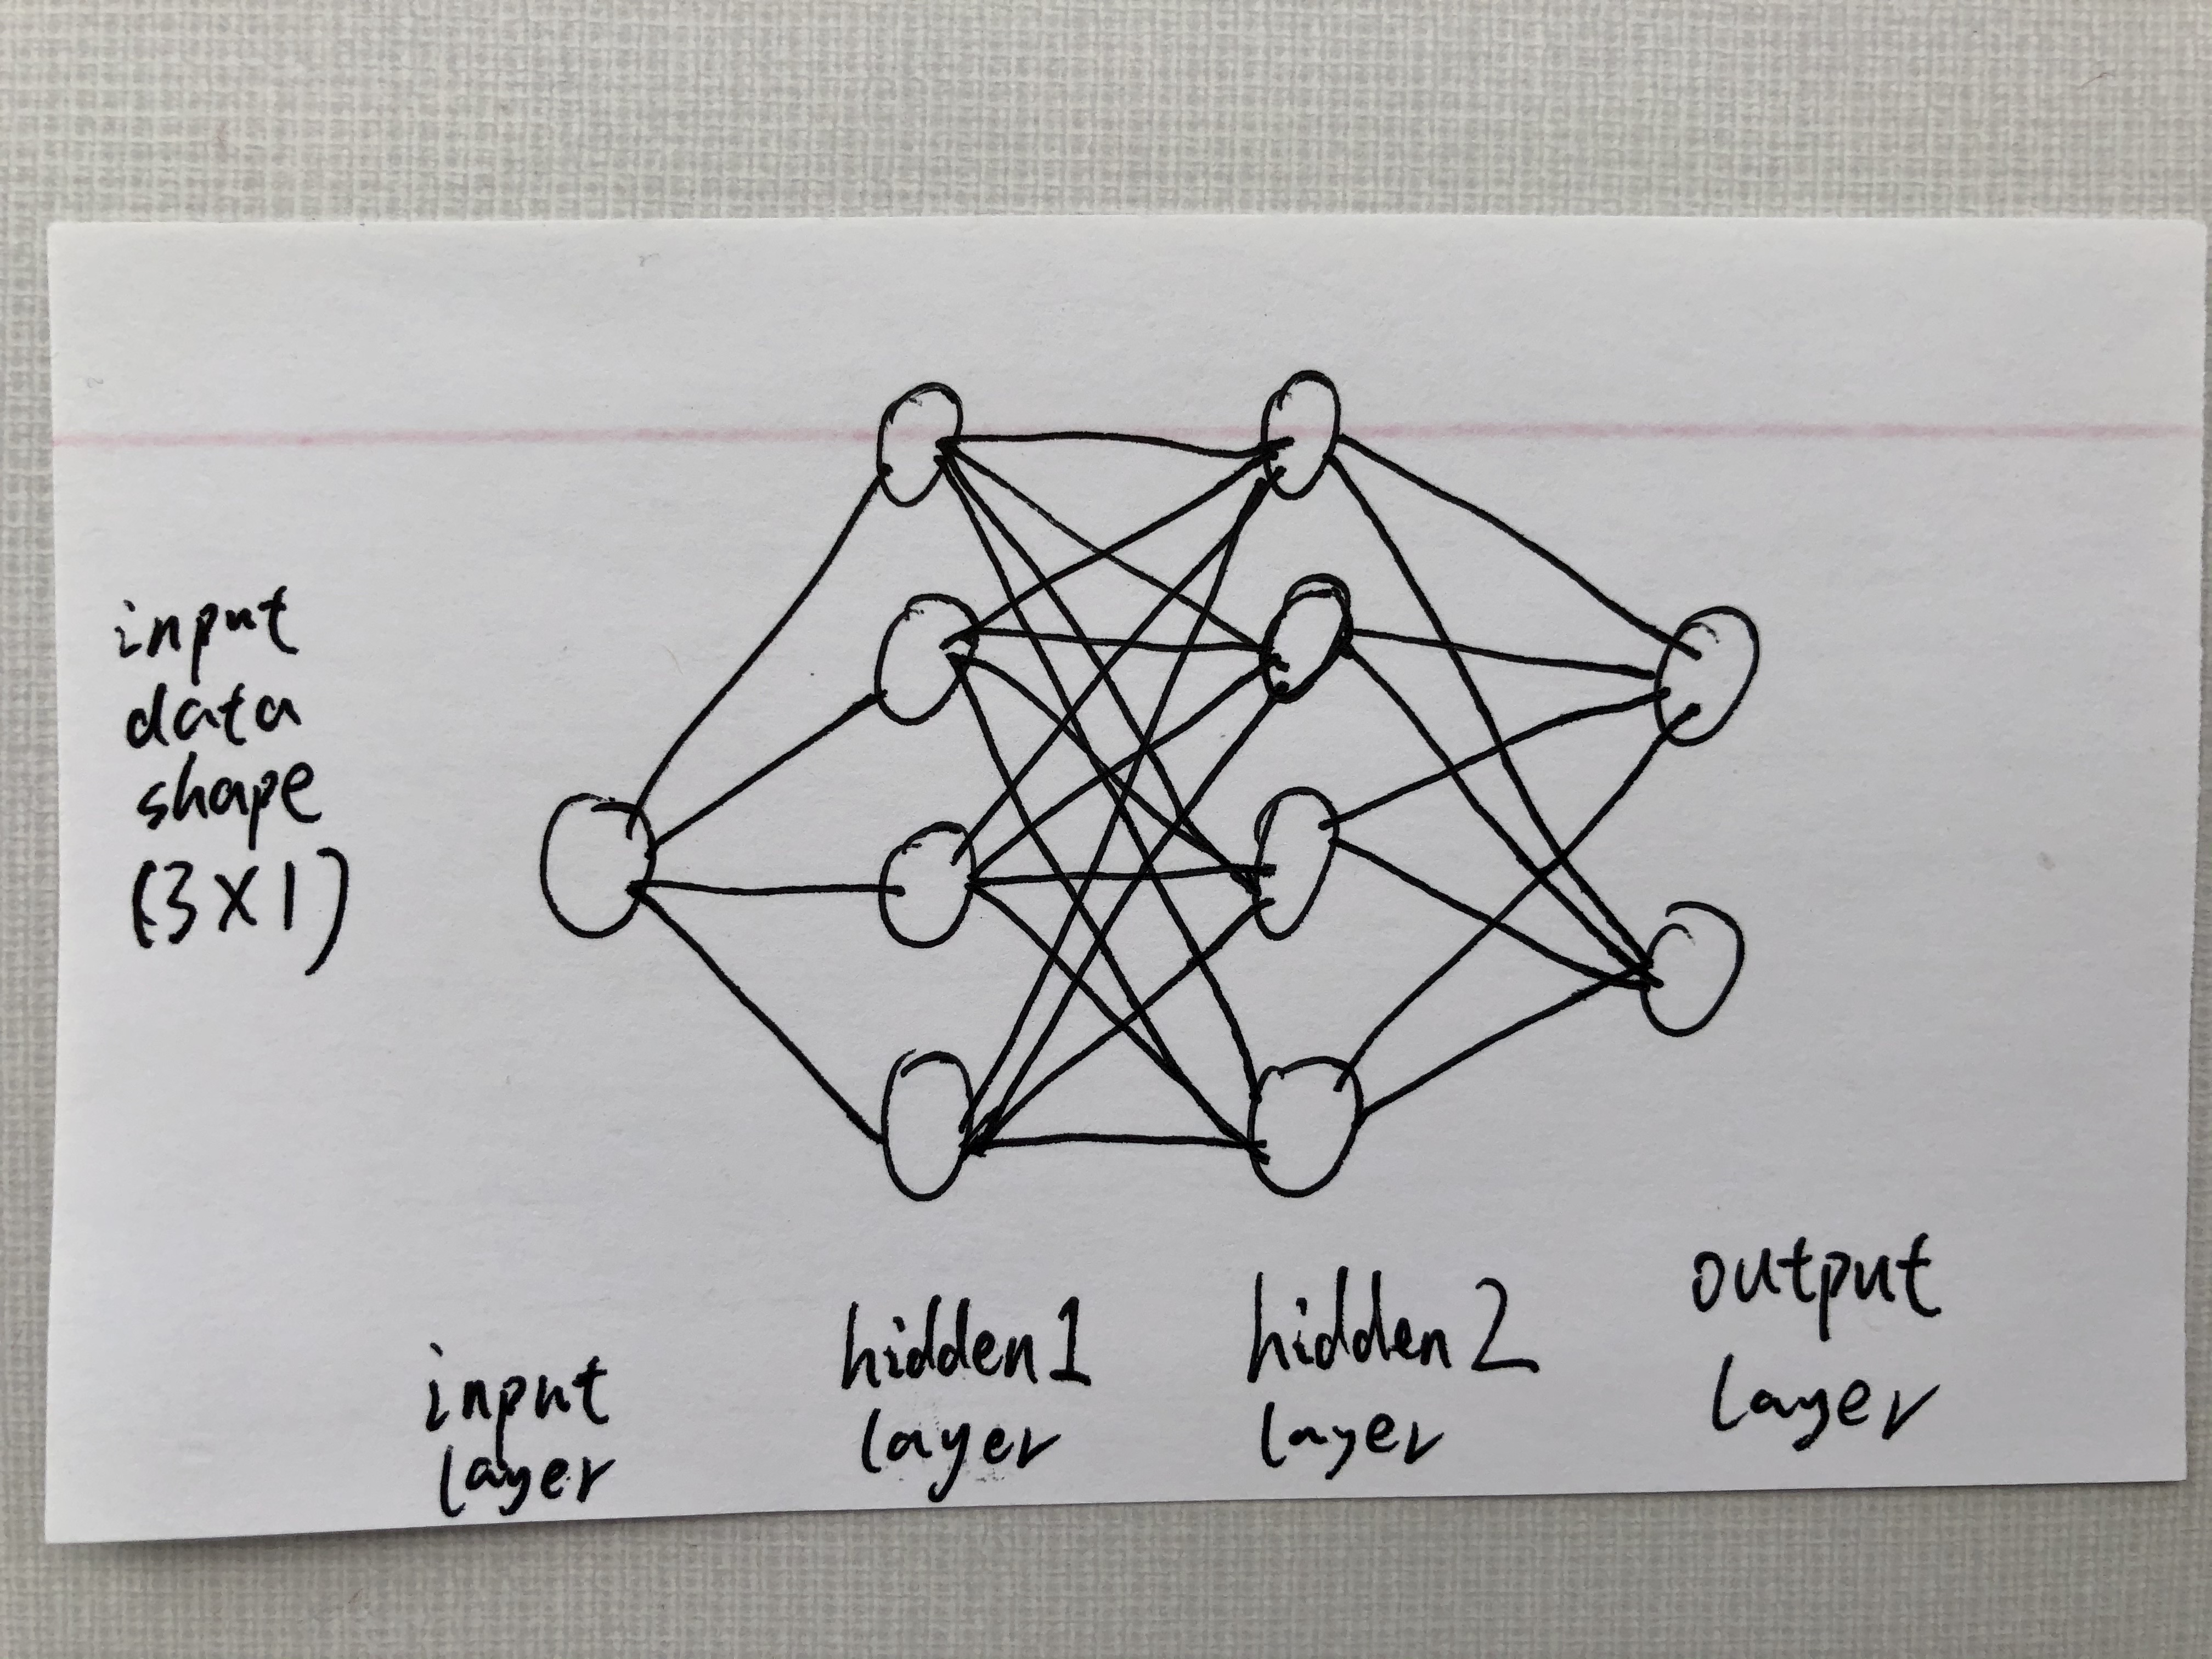

In [67]:
# Please fill out the Nones using anything appropriate (open question)
# Input layer 1 node; hidden layer1 4 nodes; hidden layer2 4 nodes; output layer 2 nodes
# HINT: Keep the shape requirements in mind

import numpy as np
x = np.random.randn(3, 1) # random input vector of three numbers (3x1)
# weights of each layer
W1 = np.array([[1],[0],[1]]) #input layer
W2 = np.array([[0],[1],[0],[1]]) #hidden layer1 (weight matrix from input to hidden1 layer)
W3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]) #hidden layer2 (weight matrix from hidden1 layer to hidden2 layer)
W4 = np.array([[1,0],[0,0],[0,1],[1,1]]) #output layer (weight matrix from hidden2 layer to output layer)
# bias of each layer
b1 = np.array([[11]]) #input layer
b2 = np.array([[12],[1],[8],[5]]) #hidden layer1
b3 = np.array([[4],[7],[3],[0]]) #hidden layer2
b4 = np.array([[1],[0]]) #output layer

def f(a):
   return 1/(1+np.exp(-a)) # write out sigmoid activation function in numpy (use sigmoid activation for all layers)
input = f(np.sum(W1 * x) + b1) # calculate input layer activations
h1 = f((W2 * input) + b2) # calculate first hidden layer activations
h2 = f(np.expand_dims(np.sum(W3 * h1, axis=0), axis=1) + b3) # calculate second hidden layer activations
out = f(np.expand_dims(np.sum(W4 * h2, axis=0), axis=1) + b4) # calculate output layer activations
print(out)

[[0.93842109]
 [0.84717062]]


In [68]:
print(W1.shape); print(W2.shape); print(W3.shape); print(W4.shape)
print(b1.shape); print(b2.shape); print(b3.shape); print(b4.shape)
print(input.shape); print(h1.shape); print(h2.shape); print(out.shape)

(3, 1)
(4, 1)
(4, 4)
(4, 2)
(1, 1)
(4, 1)
(4, 1)
(2, 1)
(1, 1)
(4, 1)
(4, 1)
(2, 1)


**Q3 Build CNN by stacking layers** (50 points):  \
Write a Convolutional Neural Network (at least 10-layer deep) to classify all 10 classes of CIFAR10. Use training samples to train your model, use validation samples to validate your model, and use testing samples to evaluate the performance of trained model. 

You should: **1**. Train the model for at least 10 epochs. **2**. Report the AUROC of each type of images in the test set (eg. AUC of airplane = 0.98) and plot the ROC curves. 

**Note:** 1. Building blocks of CNN layers in Keras/Tensorflow and pytorch are recommended for this question. 2. You may also import/load fullsize existing architectures (eg. Inception, Resnet, VGG) from APIs, but you will only get 50% of the points for this question. 3. Loading pretrained models of any kinds or copying from the demo will get 0 point for this question. 

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:

(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

Hot-encoding the target

In [3]:

trained_labels = to_categorical(train_set_labels)
test_labels = to_categorical(test_set_labels)
validate_labels = to_categorical(validation_set_labels)

In [14]:
cnn_model = Sequential()

cnn_model.add(Conv2D(128, kernel_size=2, activation='relu', input_shape=(32,32,3)))
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn_model.add(Conv2D(32, kernel_size=2, activation='relu'))
cnn_model.add(Conv2D(16, kernel_size=4, activation='relu'))
cnn_model.add(Conv2D(16, kernel_size=5, activation='relu'))
cnn_model.add(Conv2D(32, kernel_size=2, activation='relu'))
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn_model.add(Conv2D(16, kernel_size=4, activation='relu'))
cnn_model.add(Conv2D(64, kernel_size=2, activation='relu'))
cnn_model.add(Conv2D(128, kernel_size=2, activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(10, activation='softmax'))

In [15]:
#compile model using accuracy to measure model performance
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

print(cnn_model.summary())

#train the model
cnn_model.fit(train_set_images, trained_labels, validation_data=(validation_set_images, validate_labels), epochs=10, batch_size=64)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 31, 31, 128)       1664      
                                                                 
 conv2d_58 (Conv2D)          (None, 29, 29, 64)        73792     
                                                                 
 conv2d_59 (Conv2D)          (None, 28, 28, 32)        8224      
                                                                 
 conv2d_60 (Conv2D)          (None, 25, 25, 16)        8208      
                                                                 
 conv2d_61 (Conv2D)          (None, 21, 21, 16)        6416      
                                                                 
 conv2d_62 (Conv2D)          (None, 20, 20, 32)        2080      
                                                                 
 conv2d_63 (Conv2D)          (None, 18, 18, 64)       

In [16]:
prediction_cnn = cnn_model.predict(test_set_images)

In [18]:
prediction_cnn

array([[3.1562021e-03, 6.8030594e-04, 1.6030766e-01, ..., 1.1489121e-01,
        2.5616167e-02, 7.5817476e-03],
       [5.9350556e-01, 1.6673449e-01, 1.2992784e-04, ..., 1.1954505e-07,
        2.1716250e-01, 2.1828612e-02],
       [2.5118881e-01, 1.1886112e-01, 5.3244657e-03, ..., 4.2908770e-04,
        4.2979807e-01, 1.2073189e-01],
       ...,
       [1.7956758e-04, 2.2299366e-06, 2.1110384e-02, ..., 7.5575583e-02,
        8.0692211e-05, 1.2426380e-04],
       [2.8960917e-02, 4.7231558e-01, 7.7710240e-03, ..., 7.3110476e-02,
        5.9752964e-04, 7.7687047e-02],
       [9.1359941e-03, 1.7803675e-04, 3.0956116e-02, ..., 7.9349542e-01,
        4.7638856e-05, 8.8907569e-04]], dtype=float32)

In [28]:
test_set_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [38]:
labels = test_labels.argmax(axis=1)
labels

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc_score = dict()

for i in range(10):
    fpr[i], tpr[i], threshold = roc_curve(labels, prediction_cnn[:, i], pos_label=i)
    roc_auc_score[i] = auc(fpr[i], tpr[i])

**Printing all the AUC scores upto 4 decimal places for each image class on *test set data*.**

In [65]:
print("AUC score for Airplane is: ", "{:.4f}".format(roc_auc_score[0]))
print("AUC score for Automobile is: ", "{:.4f}".format(roc_auc_score[1]))
print("AUC score for Bird is: ", "{:.4f}".format(roc_auc_score[2]))
print("AUC score for Cat is: ", "{:.4f}".format(roc_auc_score[3]))
print("AUC score for Deer is: ", "{:.4f}".format(roc_auc_score[4]))
print("AUC score for Dog is: ", "{:.4f}".format(roc_auc_score[5]))
print("AUC score for Frog is: ", "{:.4f}".format(roc_auc_score[6]))
print("AUC score for Horse is: ", "{:.4f}".format(roc_auc_score[7]))
print("AUC score for Ship is: ", "{:.4f}".format(roc_auc_score[8]))
print("AUC score for Truck is: ", "{:.4f}".format(roc_auc_score[9]))

AUC score for Airplane is:  0.9065
AUC score for Automobile is:  0.9520
AUC score for Bird is:  0.8200
AUC score for Cat is:  0.8232
AUC score for Deer is:  0.8577
AUC score for Dog is:  0.8854
AUC score for Frog is:  0.9295
AUC score for Horse is:  0.9093
AUC score for Ship is:  0.9464
AUC score for Truck is:  0.9352


**Plotting the ROC AUC curve for each image type separately on *test set data*.**

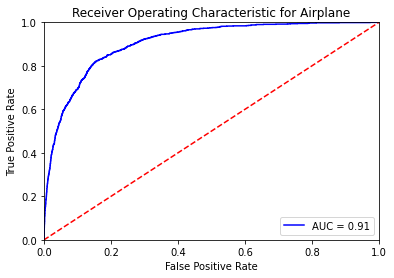

In [69]:
#ROC plot of Airplane
plt.title('Receiver Operating Characteristic for Airplane')
plt.plot(fpr[0], tpr[0], 'b', label = 'AUC = %0.2f' % roc_auc_score[0]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


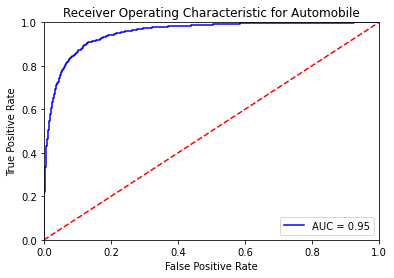

In [70]:
#ROC plot of Automobile
plt.title('Receiver Operating Characteristic for Automobile')
plt.plot(fpr[1], tpr[1], 'b', label = 'AUC = %0.2f' % roc_auc_score[1]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


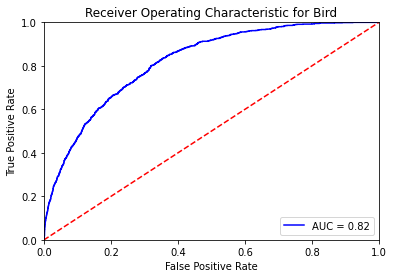

In [71]:
#ROC plot of Bird
plt.title('Receiver Operating Characteristic for Bird')
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC = %0.2f' % roc_auc_score[2]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

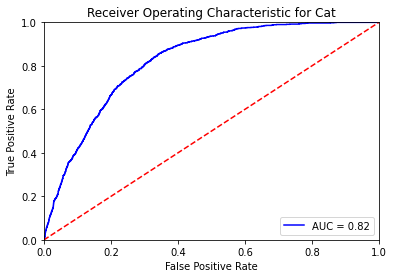

In [72]:
#ROC plot of Cat
plt.title('Receiver Operating Characteristic for Cat')
plt.plot(fpr[3], tpr[3], 'b', label = 'AUC = %0.2f' % roc_auc_score[3]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

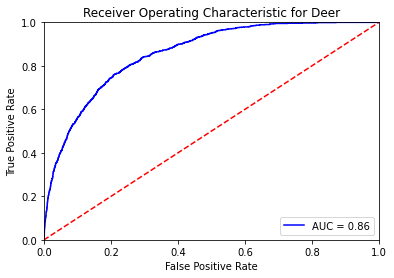

In [73]:
#ROC plot of Deer
plt.title('Receiver Operating Characteristic for Deer')
plt.plot(fpr[4], tpr[4], 'b', label = 'AUC = %0.2f' % roc_auc_score[4]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

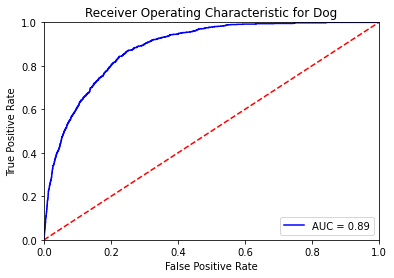

In [74]:
#ROC plot of Dog
plt.title('Receiver Operating Characteristic for Dog')
plt.plot(fpr[5], tpr[5], 'b', label = 'AUC = %0.2f' % roc_auc_score[5]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

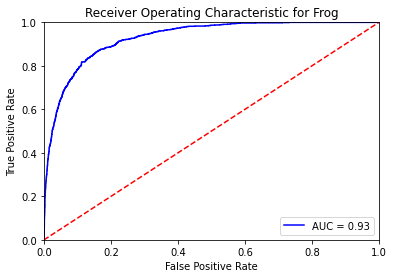

In [75]:
#ROC plot of Frog
plt.title('Receiver Operating Characteristic for Frog')
plt.plot(fpr[6], tpr[6], 'b', label = 'AUC = %0.2f' % roc_auc_score[6]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

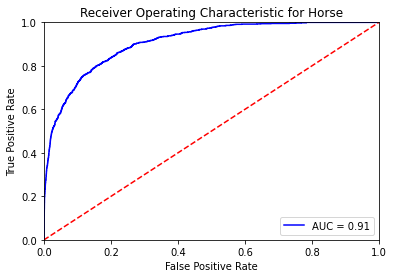

In [76]:
#ROC plot of Horse
plt.title('Receiver Operating Characteristic for Horse')
plt.plot(fpr[7], tpr[7], 'b', label = 'AUC = %0.2f' % roc_auc_score[7]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

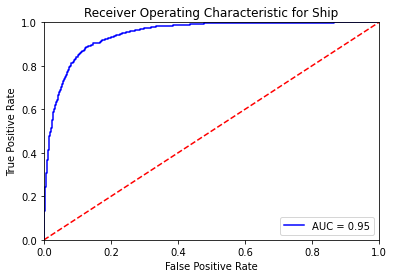

In [77]:
#ROC plot of Ship
plt.title('Receiver Operating Characteristic for Ship')
plt.plot(fpr[8], tpr[8], 'b', label = 'AUC = %0.2f' % roc_auc_score[8]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

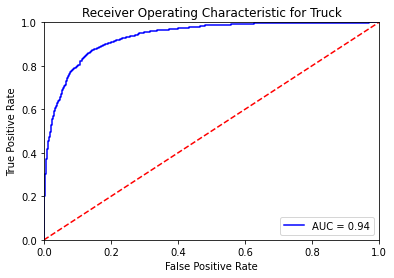

In [78]:
#ROC plot of Truck
plt.title('Receiver Operating Characteristic for Truck')
plt.plot(fpr[9], tpr[9], 'b', label = 'AUC = %0.2f' % roc_auc_score[9]) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()